In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [4]:
data = pd.read_csv('C:/Users/PMLS/Desktop/ai/ML lab/archive (1)/drug200.csv')


print(data.head())


   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY


In [5]:
label_encoders = {}
categorical_columns = ['Sex', 'BP', 'Cholesterol', 'Drug']

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


print(data.head())


   Age  Sex  BP  Cholesterol  Na_to_K  Drug
0   23    0   0            0   25.355     0
1   47    1   1            0   13.093     3
2   47    1   1            0   10.114     3
3   28    0   2            0    7.798     4
4   61    0   1            0   18.043     0


In [6]:
X = data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
y = data['Drug'].values


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
 # Class distribution in the dataset
class_distribution = data['Drug'].value_counts()
print(class_distribution)


Drug
0    91
4    54
1    23
3    16
2    16
Name: count, dtype: int64


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Defining hyperparameter grids for each model
rf_param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20]
}

knn_param_grid = {
    'n_neighbors': [1,3, 5, 6],
    'weights': ['uniform', 'distance']
}

svc_param_grid = {
    'C': [0.1, 1,2,4,5, 10],
    'kernel': ['linear', 'rbf']
}


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# List to store results
results = {}

# Random Forest
rf = RandomForestClassifier()
rf_grid_search = GridSearchCV(
    estimator=rf,
    param_grid=rf_param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=2
)
rf_grid_search.fit(X_train, y_train)
results['Random Forest'] = rf_grid_search

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn_grid_search = GridSearchCV(
    estimator=knn,
    param_grid=knn_param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=2
)
knn_grid_search.fit(X_train, y_train)
results['KNN'] = knn_grid_search

# Support Vector Machine
svc = SVC()
svc_grid_search = GridSearchCV(
    estimator=svc,
    param_grid=svc_param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=2
)
svc_grid_search.fit(X_train, y_train)
results['SVM'] = svc_grid_search


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits


c:\Users\PMLS\Desktop\GAN\ganenv\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [10]:
for model_name, grid_search in results.items():
    print(f"Results for {model_name}:")
    print("Best Parameters:", grid_search.best_params_)
    print("Best Cross-Validation Accuracy:", grid_search.best_score_)
    
    # Evaluate on test set
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)


Results for Random Forest:
Best Parameters: {'max_depth': None, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.99375

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

--------------------------------------------------
Results for KNN:
Best Parameters: {'n_neighbors': 3, 'weights': 'uniform'}
Best Cross-Validation Accuracy: 0.70625

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.56      0.83      0.67         6
         

FEATURE SCALING 

In [11]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


RESULTS AFTER FEATURE SCALING

In [12]:
results_S = {}


rf_grid_search.fit(X_train, y_train)
results_S['Random Forest'] = rf_grid_search



knn_grid_search.fit(X_train, y_train)
results_S['KNN'] = knn_grid_search




svc_grid_search.fit(X_train, y_train)
results_S['SVM'] = svc_grid_search


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [13]:
for model_name, grid_search in results_S.items():
    print(f"Results for {model_name}:")
    print("Best Parameters:", grid_search.best_params_)
    print("Best Cross-Validation Accuracy:", grid_search.best_score_)
    
    # Evaluate on test set
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)


Results for Random Forest:
Best Parameters: {'max_depth': 10, 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.99375

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

--------------------------------------------------
Results for KNN:
Best Parameters: {'n_neighbors': 1, 'weights': 'uniform'}
Best Cross-Validation Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.83      0.91         6
           2   

BALANCING THE DATA

In [14]:
from collections import Counter

from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

print("Resampled Class Distribution:", Counter(y_train_under))

Resampled Class Distribution: Counter({np.int64(0): 11, np.int64(1): 11, np.int64(2): 11, np.int64(3): 11, np.int64(4): 11})


In [15]:
results_B = {}


rf_grid_search.fit(X_train, y_train)
results_S['Random Forest'] = rf_grid_search



knn_grid_search.fit(X_train, y_train)
results_S['KNN'] = knn_grid_search




svc_grid_search.fit(X_train, y_train)
results_S['SVM'] = svc_grid_search


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [16]:
for model_name, grid_search in results_S.items():
    print(f"Results for {model_name}:")
    print("Best Parameters:", grid_search.best_params_)
    print("Best Cross-Validation Accuracy:", grid_search.best_score_)
    
    # Evaluate on test set
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Results for Random Forest:
Best Parameters: {'max_depth': 10, 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.99375

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       1.00      0.80      0.89         5
           4       0.92      1.00      0.96        11

    accuracy                           0.97        40
   macro avg       0.98      0.96      0.97        40
weighted avg       0.98      0.97      0.97        40

--------------------------------------------------
Results for KNN:
Best Parameters: {'n_neighbors': 1, 'weights': 'uniform'}
Best Cross-Validation Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.83      0.91         6
           2   

In [23]:
# Initialize a dictionary for storing metrics
comparison_results = {
    'ModelN': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

# Iterate over each model's results
for model_name, grid_search in results.items():
    # Get the best model and predictions
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    # Generate classification report as a dictionary
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Extract metrics for the 'weighted avg' (handles imbalanced datasets better)
    comparison_results['ModelN'].append(model_name)
    comparison_results['Accuracy'].append(report['accuracy'])
    comparison_results['Precision'].append(report['weighted avg']['precision'])
    comparison_results['Recall'].append(report['weighted avg']['recall'])
    comparison_results['F1-Score'].append(report['weighted avg']['f1-score'])

# Convert to DataFrame for visualization
comparison_df = pd.DataFrame(comparison_results)



In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\PMLS\AppData\Local\Temp\ipykernel_21372\2658081470.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=comparison_df['ModelN'], y=comparison_df['Accuracy'], palette='viridis')


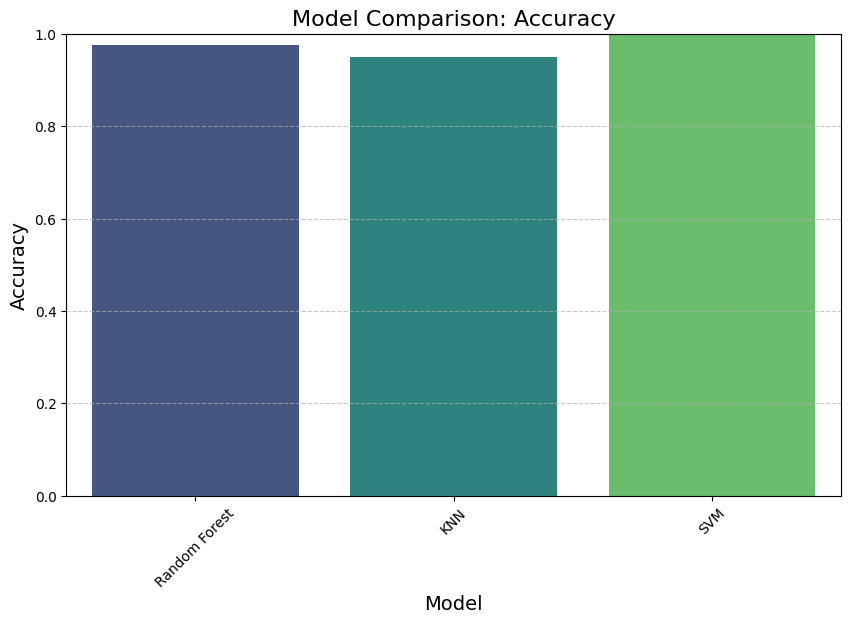

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x=comparison_df['ModelN'], y=comparison_df['Accuracy'], palette='viridis')
plt.title('Model Comparison: Accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.ylim(0, 1.0)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


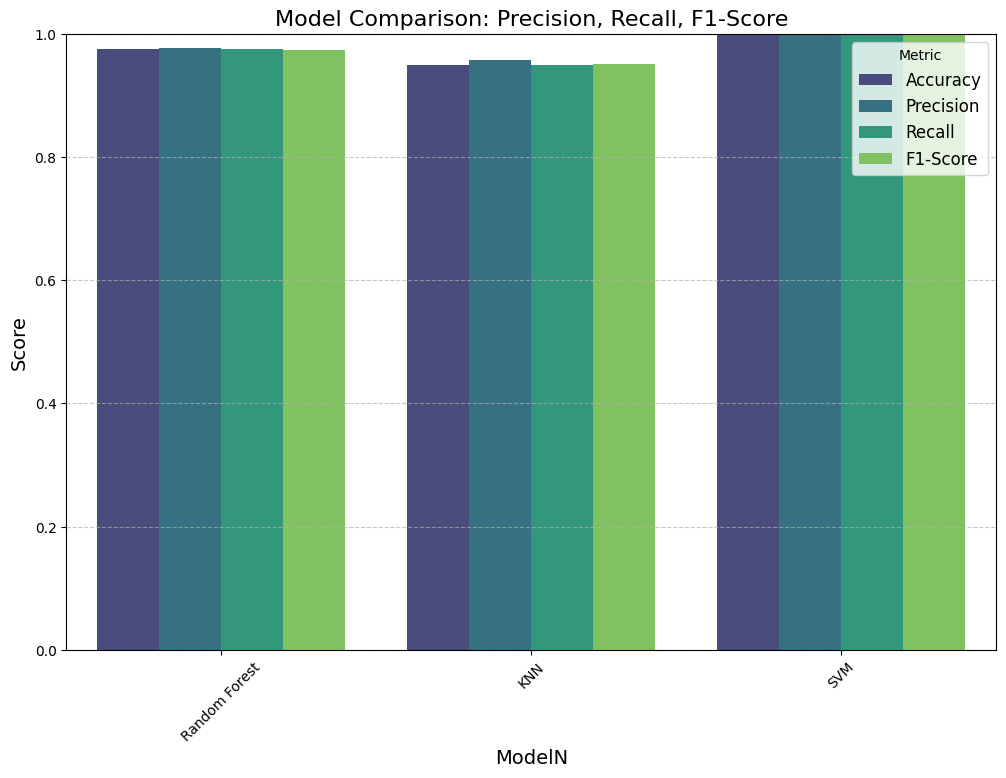

In [29]:
# Melt DataFrame for grouped bar plot
melted_df = comparison_df.melt(id_vars='ModelN', var_name='Metric', value_name='Score')

# Grouped bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='ModelN', y='Score', hue='Metric', data=melted_df, palette='viridis')
plt.title('Model Comparison: Precision, Recall, F1-Score', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.xlabel('ModelN', fontsize=14)
plt.ylim(0, 1.0)
plt.xticks(rotation=45)
plt.legend(title='Metric', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


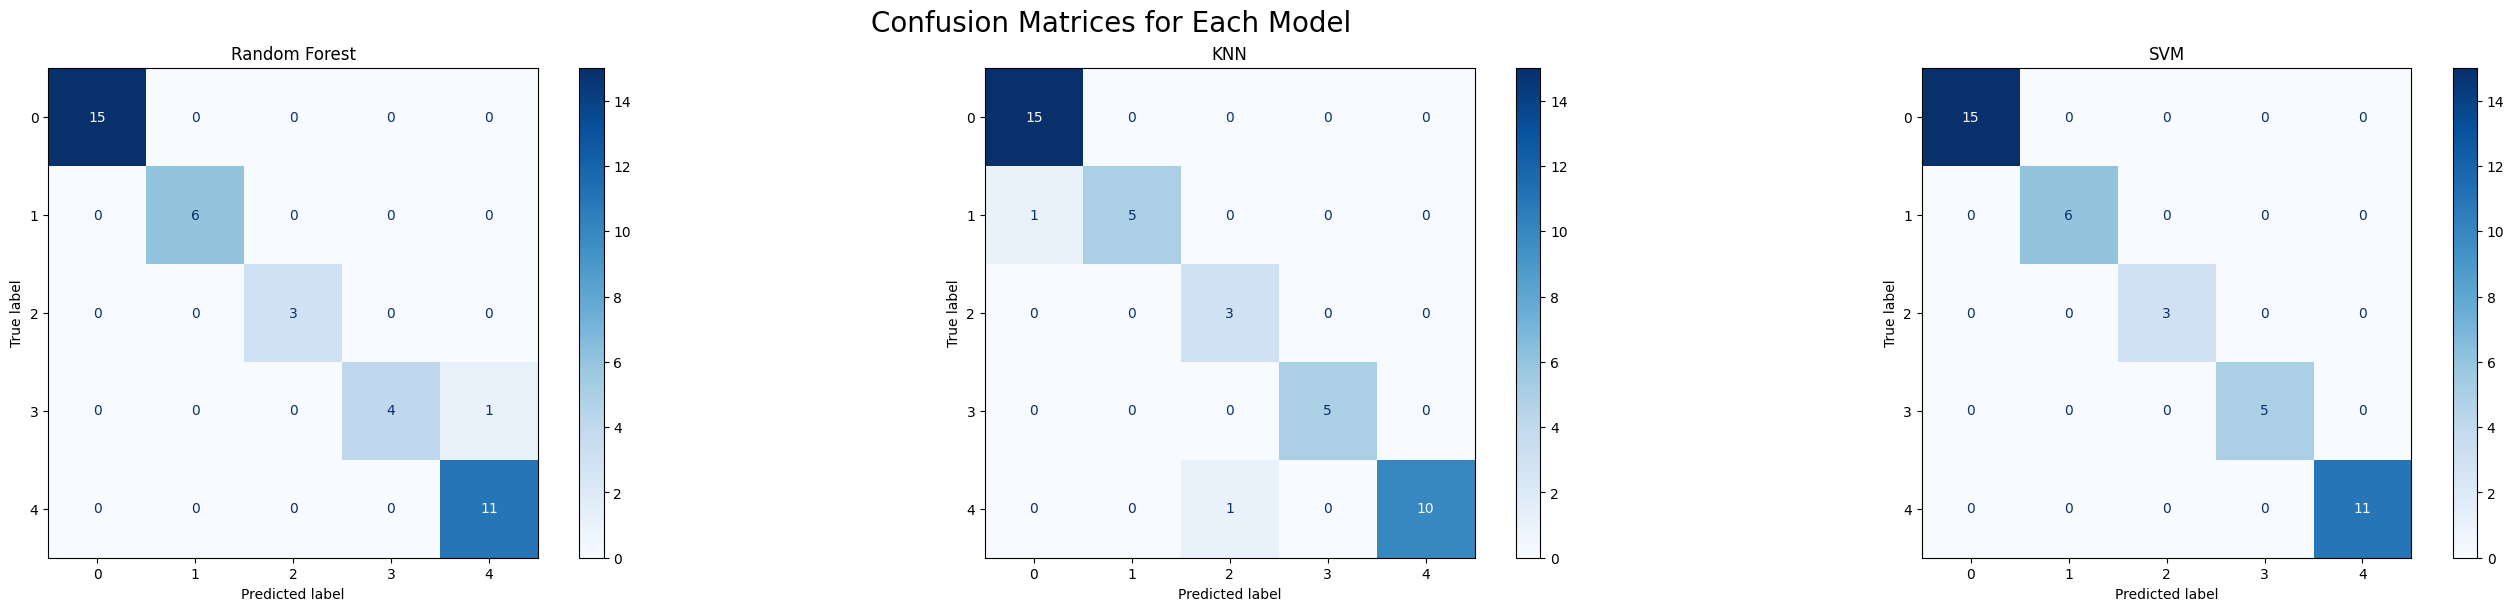

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(1, len(results), figsize=(28, 6), constrained_layout=True)

# Iterate over each model and plot its confusion matrix
for ax, (model_name, grid_search) in zip(axes, results.items()):
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax, cmap="Blues")
    ax.title.set_text(f'{model_name}')

plt.suptitle('Confusion Matrices for Each Model', fontsize=20)
plt.show()
